**데이터 시각화 - Seaborn**

# Seaborn 라이브러리

## Seaborn 소개와 matplotlib과의 차이점

#### Seaborn이란?
Seaborn은 Python의 데이터 시각화 라이브러리로, matplotlib을 기반으로 만들어졌습니다. **"통계적 시각화를 아름답고 쉽게"**가 핵심 철학입니다.

#### matplotlib vs Seaborn 비교

| 특징 | Matplotlib | Seaborn |
|------|------------|---------|
| 학습 난이도 | 어려움 | 쉬움 |
| 코드 길이 | 길고 복잡 | 짧고 간단 |
| 기본 디자인 | 단순함 | 세련됨 |
| 통계 기능 | 기본적 | 풍부함 |
| 데이터 형식 | 배열/리스트 | DataFrame 친화적 |

#### Seaborn 장점
1. **한 줄로 복잡한 그래프 생성**: `sns.scatterplot(data=df, x='x', y='y', hue='group')`
2. **자동 범례 및 색상**: 그룹별로 자동으로 색상과 범례 생성
3. **아름다운 기본 스타일**: 별도 스타일링 없이도 깔끔한 디자인
4. **통계 정보 자동 계산**: 평균, 신뢰구간 등 자동 표시
5. **Pandas DataFrame 최적화**: 열 이름으로 직접 참조 가능

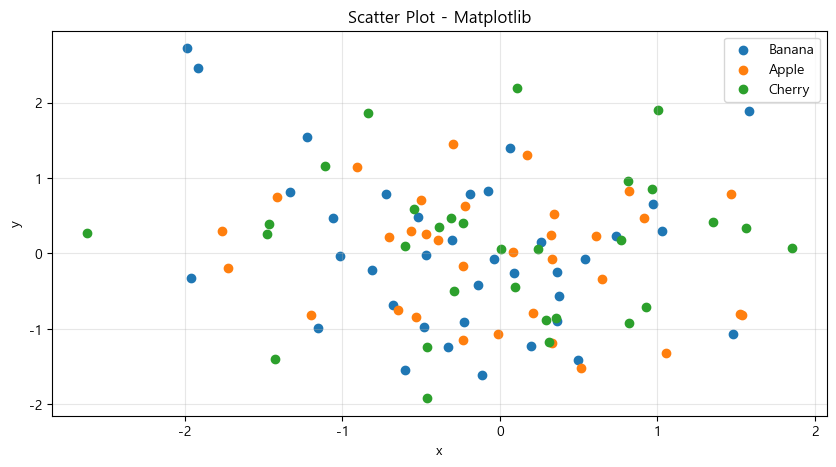

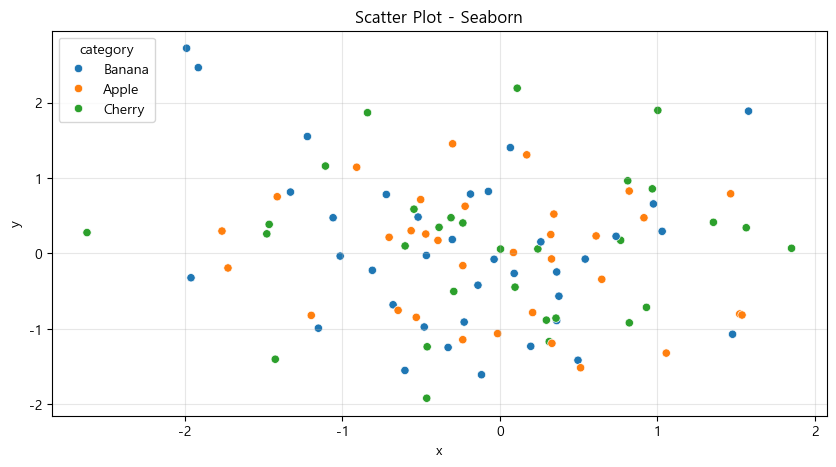

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 샘플 데이터 생성
np.random.seed(42)
data = pd.DataFrame({
    'x': np.random.randn(100),
    'y': np.random.randn(100),
    'category': np.random.choice(['Apple', 'Banana', 'Cherry'], 100)
})

# 그래프 비교
# Matplotlib 방식 (복잡함)
fig, ax = plt.subplots(figsize=(10, 5))
for cat in data['category'].unique():
    subset = data[data['category'] == cat]
    ax.scatter(subset['x'], subset['y'], label=cat)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter Plot - Matplotlib')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

# Seaborn 방식 (간단함)
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(data=data, x='x', y='y', hue='category', ax=ax)
ax.set_title('Scatter Plot - Seaborn')
ax.grid(True, alpha=0.3)
plt.show()

---

## 설치 및 기본 설정

### 설치 방법

In [10]:
# pip를 사용한 설치 (가장 일반적)
# pip install seaborn

# Seaborn 버전 확인
print(sns.__version__)

0.13.2


### 기본 임포트와 한글 설정

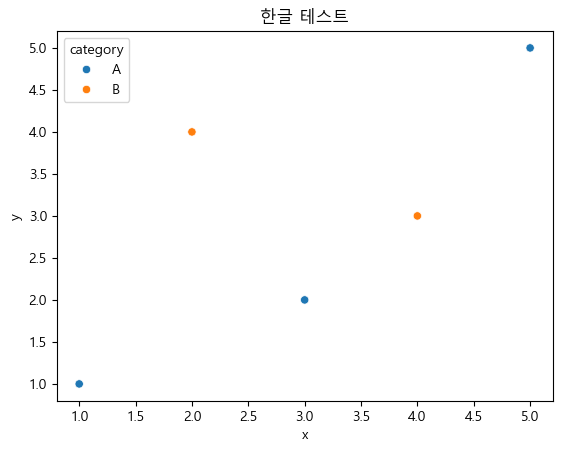

In [11]:
environment = 'LocalPC' # 개인PC 에서 실행할 때
# environment = 'Colab'   # Colab 에서 실행할 때

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm
import pandas as pd
import seaborn as sns

# # 설치된 폰트 전체 확인
# for f in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
#     print(f)

if environment == 'Colab':
    !apt-get -qq -y install fonts-nanum # 한글 폰트 설치
    font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # in Colab
else:
    font_path = 'C:/Windows/Fonts/malgun.ttf'                     # in localPC

# 런타임 재시작 없이 폰트 등록
fm.fontManager.addfont(font_path)

# 전역 기본 폰트로 설정
if environment == 'Colab':
    mpl.rcParams['font.family'] = 'NanumGothic'                   # in Colab
else:
    mpl.rcParams['font.family'] = 'Malgun Gothic'                   # in localPC

mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

df = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [1, 4, 2, 3, 5], 'category': ['A', 'B', 'A', 'B', 'A']})
sns.scatterplot(data=df, x='x', y='y', hue='category')
plt.title('한글 테스트')
plt.show()

---

## 분포 시각화

### 히스토그램

<br>

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


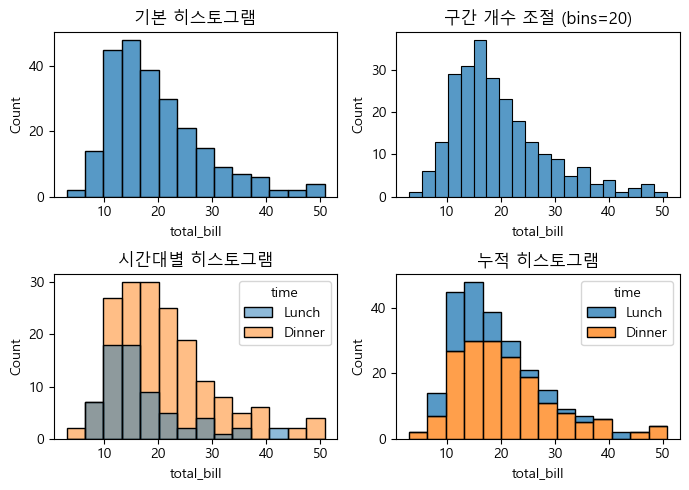

In [12]:
df = sns.load_dataset("tips")
print(df.columns)

fig = plt.figure(figsize=(7, 5))

# 히스토그램
# 계산서 금액의 분포 확인
ax1 = fig.add_subplot(2, 2, 1)
sns.histplot(data=df, x='total_bill', ax=ax1)
ax1.set_title('기본 히스토그램')

# 구간(bins) 개수 조절
ax2 = fig.add_subplot(2, 2, 2)
sns.histplot(data=df, x='total_bill', bins=20, ax=ax2)
ax2.set_title('구간 개수 조절 (bins=20)')

# 그룹별로 나누어 표시 (hue: 그룹별 색상 구분)
ax3 = fig.add_subplot(2, 2, 3)
sns.histplot(data=df, x='total_bill', hue='time', ax=ax3)
ax3.set_title('시간대별 히스토그램')

# 누적 히스토그램: 누적 빈도를 표시하는 그래프
# multiple='stack': Dinner 시간대의 계산서 금액 위에 Lunch 시간대의 계산서 금액을 쌓아서 표시
# 'layer': 겹쳐서 표시 (기본값)
# 'stack': 누적해서 표시  
# 'fill': 비율로 표시
# 'dodge': 나란히 표시
ax4 = fig.add_subplot(2, 2, 4)
sns.histplot(data=df, x='total_bill', hue='time', multiple='stack', ax=ax4)
ax4.set_title('누적 히스토그램')

plt.tight_layout()
plt.show()


### 박스 플롯

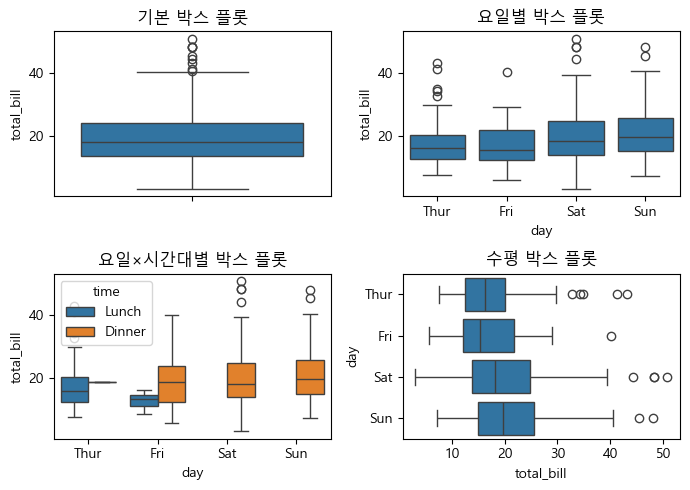

In [13]:
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

# 박스 플롯은 분포의 요약 통계를 보여줍니다
# 1. 기본 박스 플롯
# 전체 계산서 금액의 분포 확인 (중앙값, 1사분위수, 3사분위수, 정상 범위, 이상치)
sns.boxplot(data=df, y='total_bill', ax=ax1)
ax1.set_title('기본 박스 플롯')

# 2. 그룹별 박스 플롯
sns.boxplot(data=df, x='day', y='total_bill', ax=ax2)
ax2.set_title('요일별 박스 플롯')

# 3. 이중 그룹핑
sns.boxplot(data=df, x='day', y='total_bill', hue='time', ax=ax3)
ax3.set_title('요일×시간대별 박스 플롯')

# 4. 수평 박스 플롯
sns.boxplot(data=df, x='total_bill', y='day', ax=ax4)
ax4.set_title('수평 박스 플롯')

plt.tight_layout()
plt.show()

---

## 관계형 플롯

### 산점도 (Scatter Plot) 기초

#### 두 변수 간의 관계를 보여줌

```python
sns.scatterplot(data=df, x='x', y='y')
```

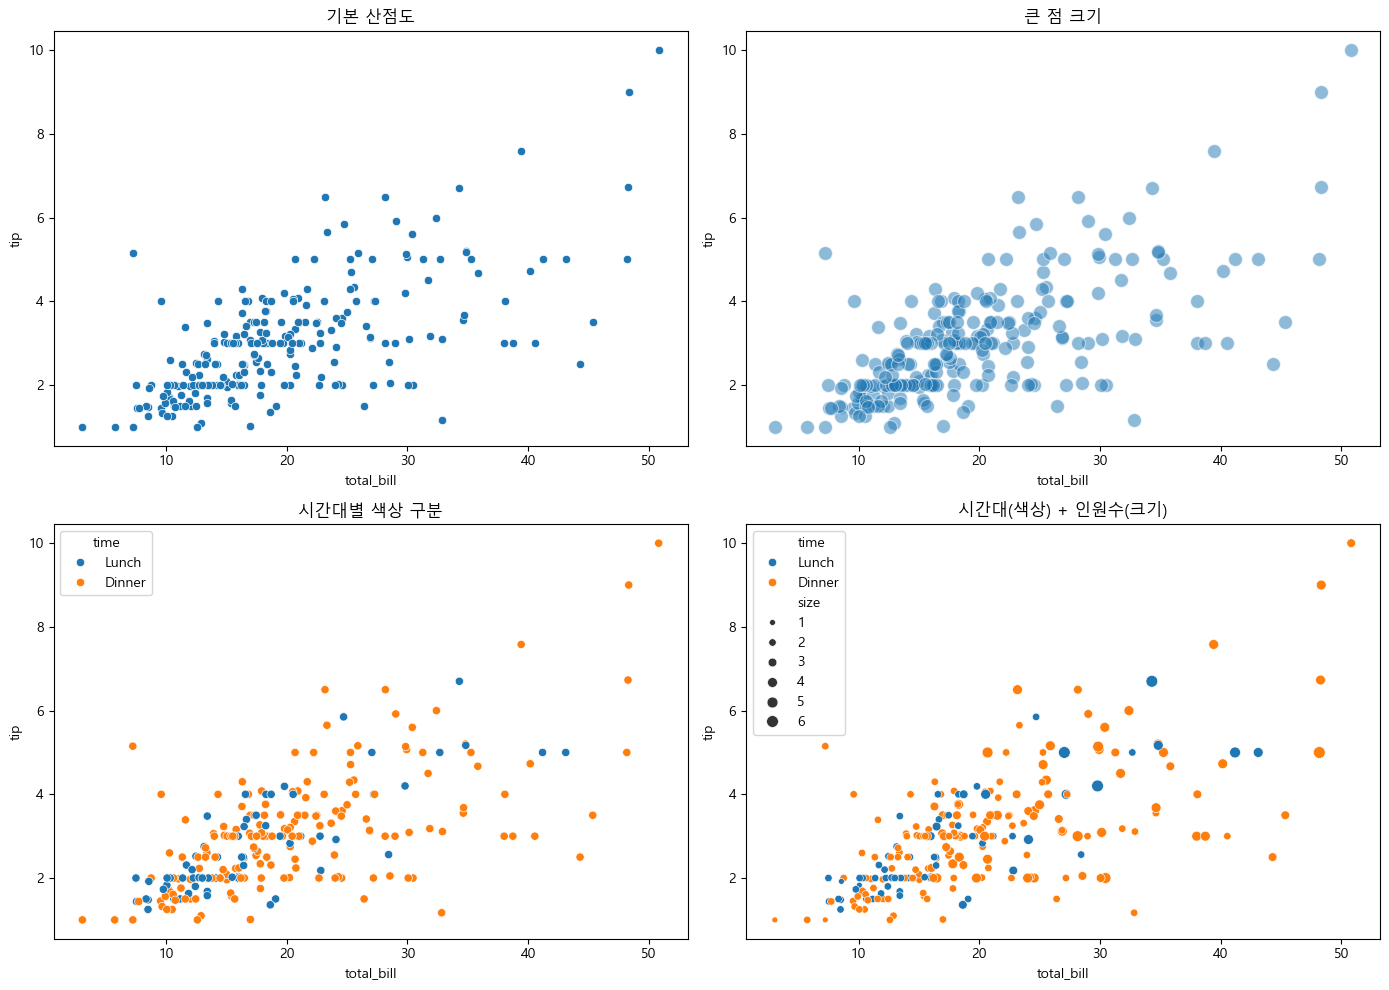

In [14]:
# 산점도는 두 변수 간의 관계를 보여줍니다
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 1. 기본 산점도
# 총 식사 금액과 팁 금액의 관계
sns.scatterplot(data=df, x='total_bill', y='tip', ax=ax1)
ax1.set_title('기본 산점도')

# 2. 점 크기 및 투명도 조절
sns.scatterplot(data=df, x='total_bill', y='tip', s=100, alpha=0.5, ax=ax2)
ax2.set_title('큰 점 크기')

# 3. 색상으로 그룹 구분 (중요!)
# 시간대별 색상 구분, 총 식사 금액과 팁 금액의 관계
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time', ax=ax3)
ax3.set_title('시간대별 색상 구분')

# 4. 점 크기로 추가 정보 표현
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time', size='size', ax=ax4)
ax4.set_title('시간대(색상) + 인원수(크기)')

plt.tight_layout()
plt.show()

### 선 그래프 (Line Plot)

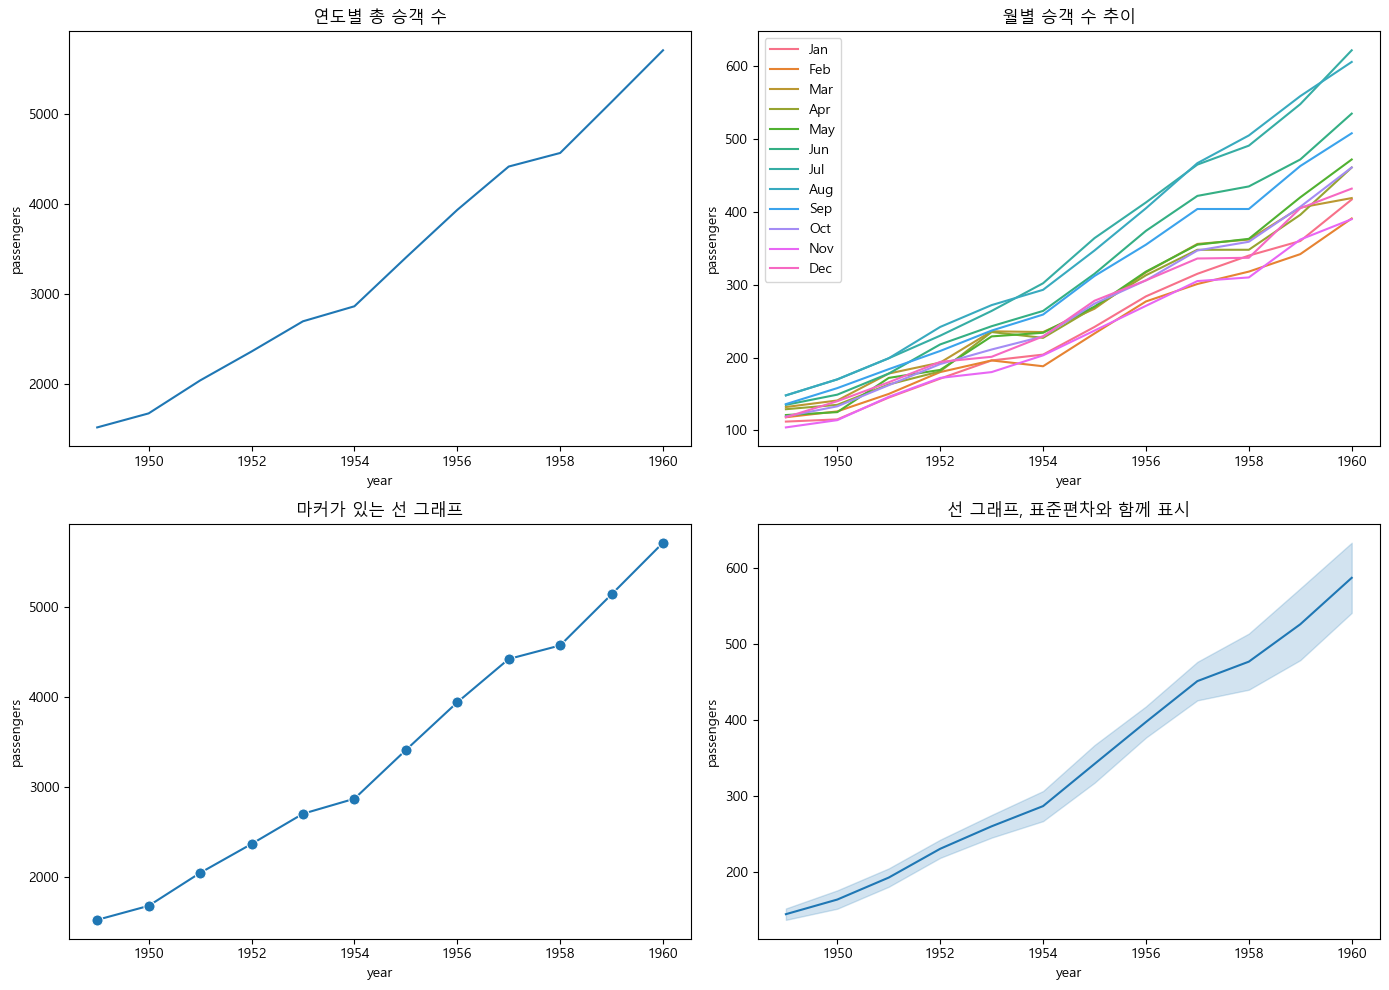

In [15]:
# 시계열 데이터에 주로 사용됩니다
df = sns.load_dataset("flights")

fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 연도별 총 승객 수
yearly_passengers = df.groupby('year')['passengers'].sum().reset_index()
sns.lineplot(data=yearly_passengers, x='year', y='passengers', ax=ax1)
ax1.set_title('연도별 총 승객 수')

# 그룹별 선 그래프
sns.lineplot(data=df, x='year', y='passengers', hue='month', ax=ax2)
ax2.set_title('월별 승객 수 추이')
ax2.legend()

sns.lineplot(data=yearly_passengers, x='year', y='passengers', 
             marker='o', markersize=8, ax=ax3)
ax3.set_title('마커가 있는 선 그래프')

# 같은 x값에 여러 y값이 있으면 평균과 표준편차를 표시
sample_data = df[df['month'].isin(['Jun', 'Jul', 'Aug'])].reset_index(drop=True)  # 여름 데이터만
sns.lineplot(data=sample_data, x='year', y='passengers', errorbar='sd', ax=ax4)
ax4.set_title('선 그래프, 표준편차와 함께 표시')

plt.tight_layout()
plt.show()

---

## 범주형 플롯

### 카운트 플랏(Count plot)

Text(0.5, 1.0, '요일별 방문 횟수')

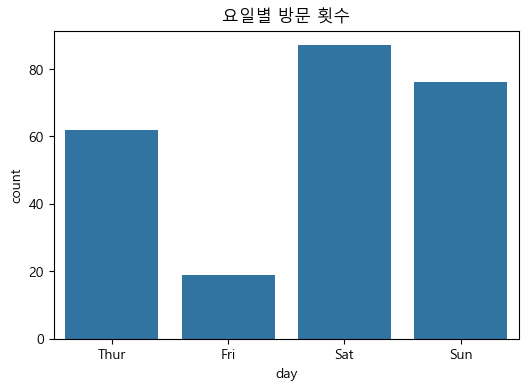

In [16]:
df = sns.load_dataset("tips")
fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(1, 1, 1)

# 1. 카운트 플롯 (개수 세기)
sns.countplot(data=df, x='day', ax=ax1)
ax1.set_title('요일별 방문 횟수')

### 막대 플랏(Bar plot)

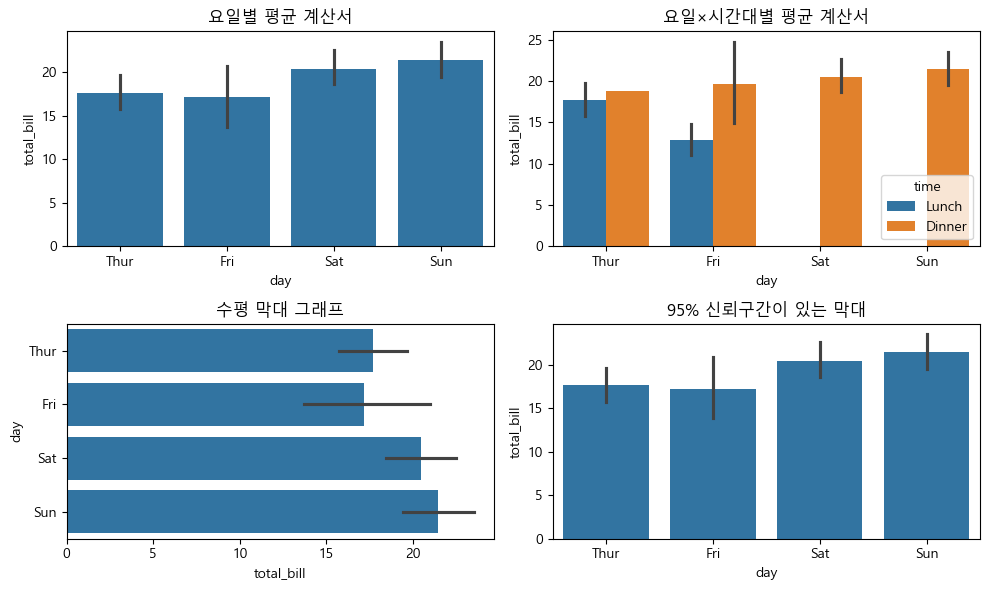

In [17]:
df = sns.load_dataset("tips")

fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 2. 막대 플롯 (평균 계산)
sns.barplot(data=df, x='day', y='total_bill', ax=ax1)
ax1.set_title('요일별 평균 계산서')

# 3. 그룹별 막대 플롯
sns.barplot(data=df, x='day', y='total_bill', hue='time', ax=ax2)
ax2.set_title('요일×시간대별 평균 계산서')

# 5. 수평 막대 그래프
sns.barplot(data=df, x='total_bill', y='day', ax=ax3)
ax3.set_title('수평 막대 그래프')

# 6. 에러바가 있는 막대 그래프
sns.barplot(data=df, x='day', y='total_bill', errorbar=('ci', 95), ax=ax4)
ax4.set_title('95% 신뢰구간이 있는 막대')

plt.tight_layout()
plt.show()

### 포인트 플랏(Point plot)

#### 그룹 간 차이를 선으로 시각화하여 상대적인 변화 추세나 경향성을 보기 직관적임

```python
sns.pointplot()
```

- 점: 평균값
- 세로 막대: 신뢰 구간
- 선: 점들을 선으로 연결하여 변화의 방향성과 추세

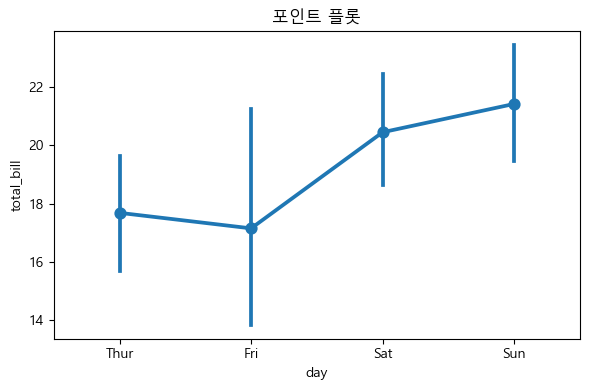

In [18]:
df = sns.load_dataset("tips")

fig = plt.figure(figsize=(6, 4))
ax1 = fig.add_subplot(1, 1, 1)

# 4. 포인트 플롯 (점과 선으로 표현)
sns.pointplot(data=df, x='day', y='total_bill', ax=ax1)
ax1.set_title('포인트 플롯')
plt.tight_layout()
plt.show()

---

## 매트릭스 플롯

### 히트맵

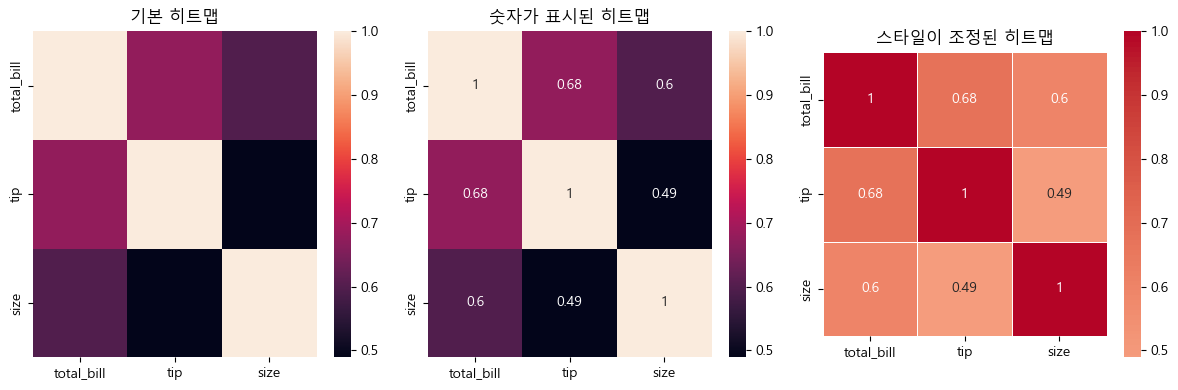

In [19]:
# 히트맵은 숫자 데이터를 색상으로 표현합니다
df = sns.load_dataset("tips")
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 1. 기본 상관관계 히트맵
numeric_data = df.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, ax=ax1)
ax1.set_title('기본 히트맵')

# 2. 숫자가 표시된 히트맵
sns.heatmap(correlation_matrix, annot=True, ax=ax2)
ax2.set_title('숫자가 표시된 히트맵')

# 3. 색상과 스타일 조정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
           center=0, square=True, linewidths=0.5, ax=ax3)
ax3.set_title('스타일이 조정된 히트맵')

plt.tight_layout()
plt.show()

### 페어플롯 (쌍별 플롯)

#### 모든 숫자 변수들 간의 관계를 한 번에 시각화

```python
sns.pairplot()
```

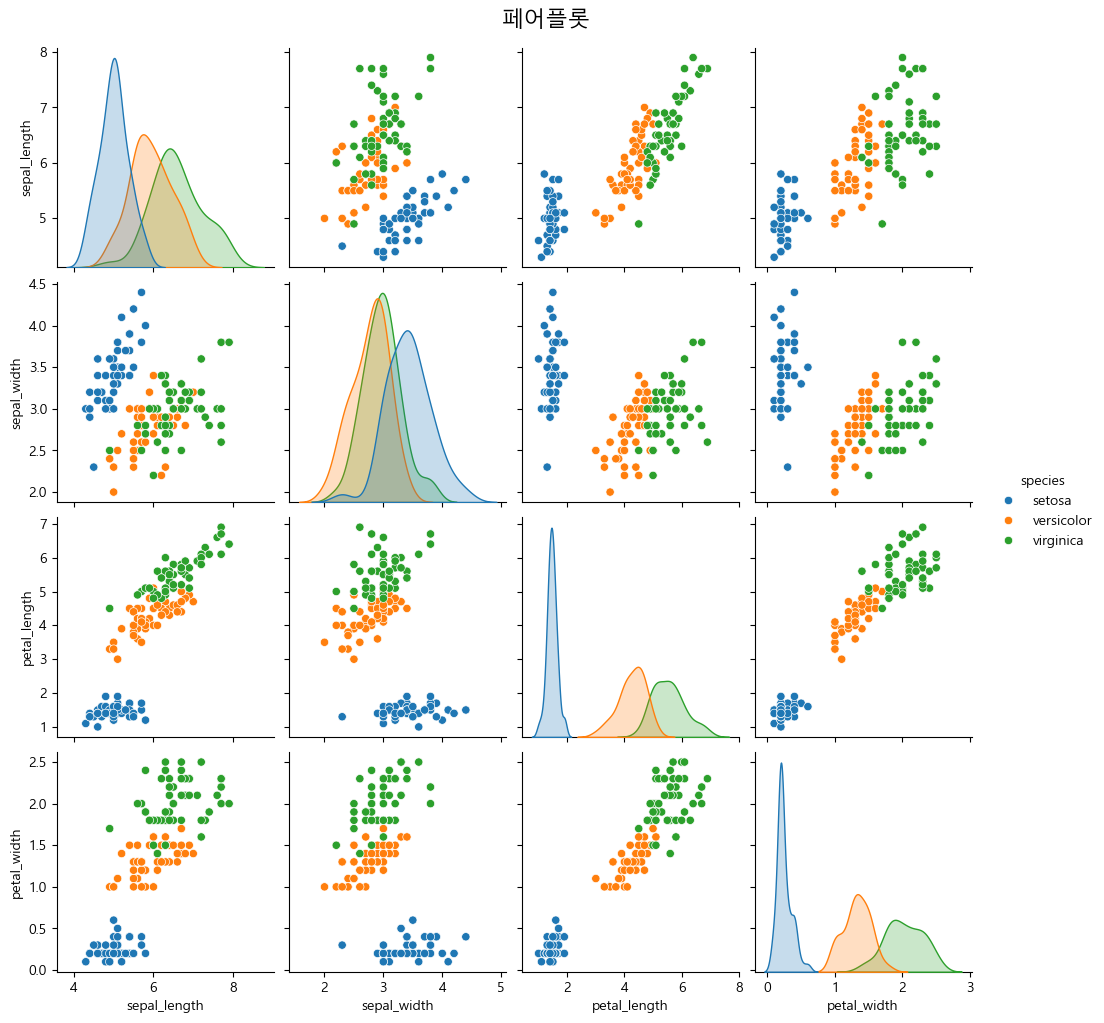

In [20]:
# 페어플롯은 모든 숫자 변수들 간의 관계를 한 번에 보여줍니다

# Iris 데이터로 페어플롯 (더 적절함)
iris = sns.load_dataset("iris")

sns.pairplot(iris, hue='species')
plt.suptitle('페어플롯', y=1.02, fontsize=16)
plt.show()

### 실습 예제

#### Iris 데이터 분석

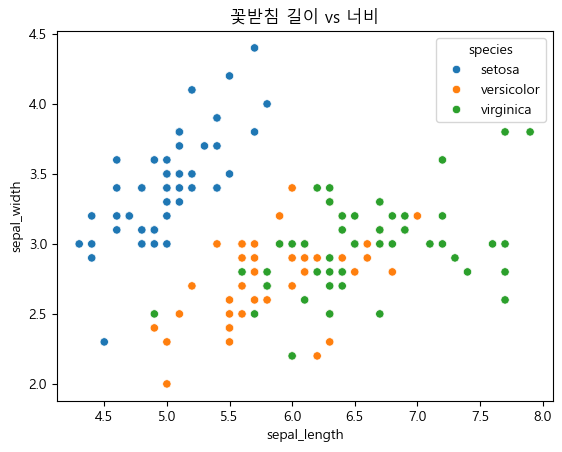

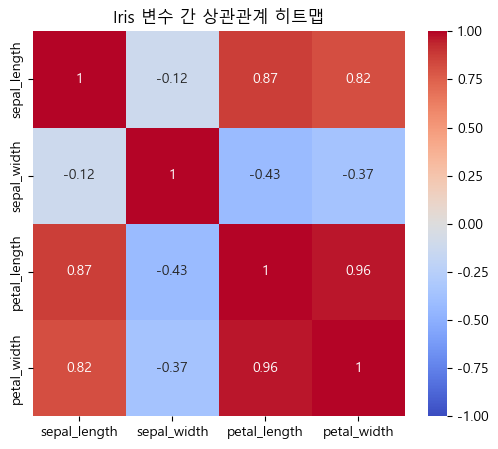

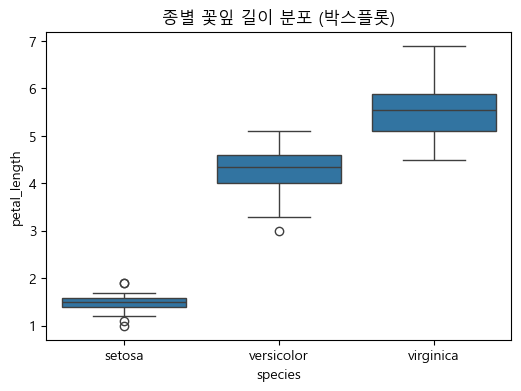

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Iris 데이터로 다음을 수행하세요:
df = sns.load_dataset("iris")

sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.title("꽃받침 길이 vs 너비")
plt.show()

plt.figure(figsize=(6, 5))
corr = df.drop(columns='species').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Iris 변수 간 상관관계 히트맵")
plt.show()

# - 종별 꽃잎 길이 분포 비교 (박스 플롯)
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='species', y='petal_length')
plt.title("종별 꽃잎 길이 분포 (박스플롯)")
plt.show()

#### Tips 데이터 기본 분석

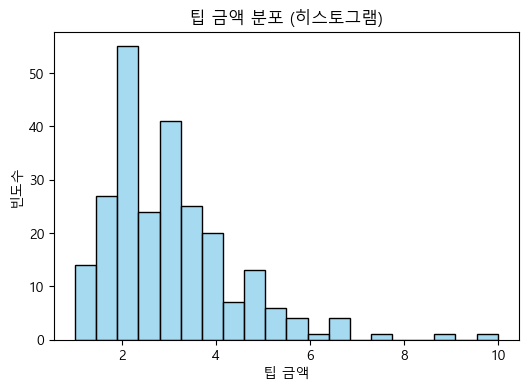

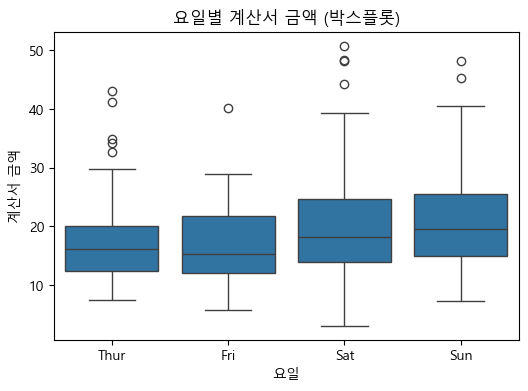

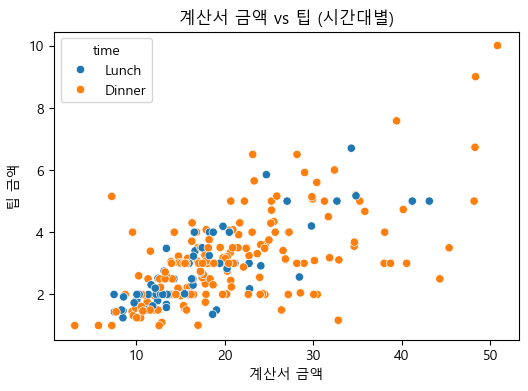

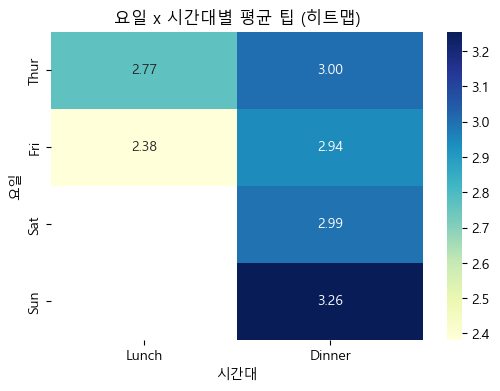

In [22]:
# 1. Tips 데이터를 로드하고 기본 정보 확인
df = sns.load_dataset("tips")

# 2. 다음 그래프들을 만들어보세요:
# - 팁 금액의 히스토그램
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='tip', bins=20, color='skyblue')
plt.title("팁 금액 분포 (히스토그램)")
plt.xlabel("팁 금액")
plt.ylabel("빈도수")
plt.show()

# - 요일별 계산서 금액 박스플롯
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='day', y='total_bill')
plt.title("요일별 계산서 금액 (박스플롯)")
plt.xlabel("요일")
plt.ylabel("계산서 금액")
plt.show()

# - 계산서와 팁의 산점도 (시간대별 색상 구분)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time')
plt.title("계산서 금액 vs 팁 (시간대별)")
plt.xlabel("계산서 금액")
plt.ylabel("팁 금액")
plt.show()

# - 요일×시간대별 평균 팁 히트맵
pivot_table = df.pivot_table(index='day', columns='time', values='tip', aggfunc='mean', observed=True)
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("요일 x 시간대별 평균 팁 (히트맵)")
plt.xlabel("시간대")
plt.ylabel("요일")
plt.show()
